# Time series analysis

In [136]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import statsmodels.api as sm
from statsmodels.tsa import stattools
from calendar import monthrange
import statsmodels.api as sm

### Practice Test

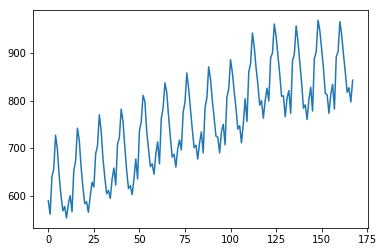

In [95]:
data = pd.read_csv('monthly-milk-production.csv', sep=';')
plt.plot(data['milk'])

In [96]:
print 'p={}'.format(np.around(sm.tsa.stattools.adfuller(data['milk'])[1], 2))

p=0.63


In [97]:
str().split()
str(data['month'].values).split('.')
month_length = np.zeros(data.shape[0])
for i in xrange(data.shape[0]):
    month_year = str(data.loc[i]['month']).split('.')
    days_in_cur_month = monthrange(int(month_year[2]), int(month_year[1]))[1]
    month_length[i] = float(days_in_cur_month)
#     val = data.loc[i]['milk'] / float(days_in_cur_month)
#     data.loc[i]['milk'] = 1
data['milk'] /= month_length

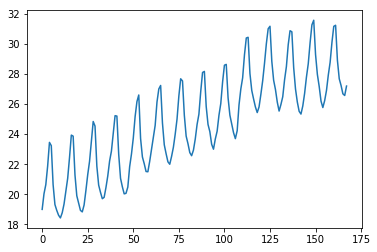

In [98]:
plt.plot(data['milk'])

In [101]:
print np.around(np.sum(data.milk), 2)

4166.33


In [102]:
milk = pd.read_csv('monthly-milk-production.csv',';', index_col=['month'], parse_dates=['month'], dayfirst=True)
milk['adjmilk'] = milk.milk / milk.index.days_in_month
print sum(milk.adjmilk)

4166.3266619


In [135]:
for t in range(12, 20):
    daily_diff1 = data['milk'] - data['milk'].shift(t)
    i = 0
    while np.isnan(daily_diff1[i]):
        del daily_diff1[i]
        i += 1
    if stattools.adfuller(daily_diff1)[1] < 0.05:
        print t
        break

daily_diff1 = data['milk'] - data['milk'].shift(1)
i = 0
while np.isnan(daily_diff1[i]):
    del daily_diff1[i]
    i += 1
print stattools.adfuller(daily_diff1)[1]

daily_diff1 = daily_diff1 - daily_diff1.shift(12)
i = daily_diff1.index[0]
while np.isnan(daily_diff1[i]):
    del daily_diff1[i]
    i += 1
print stattools.adfuller(daily_diff1)[1]

13
0.0643005465417
2.2808455518e-06


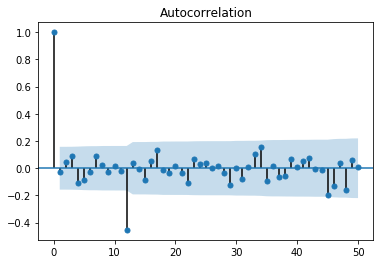

In [138]:
sm.graphics.tsa.plot_acf(daily_diff1.values.squeeze(), lags=50)
plt.show()

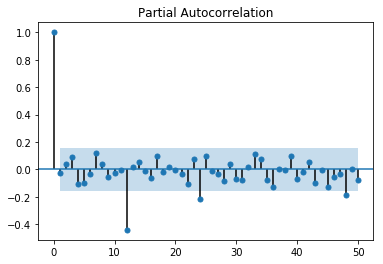

In [141]:
sm.graphics.tsa.plot_pacf(daily_diff1.values.squeeze(), lags=50)
plt.show()